# ENHANCING HOME OWNER DECISION- MAKING 

# GROUP 8

* Student pace:  part time
* Instructor name: ASHA DEEN


# MEMBERS
* JULIET WANJA THUKU
* KELVIN MUIA
* SYLVESTER MAGUNDA
* STEPHEN KIMITI



# BUSINESS UNDERSTANDING

#  DATA

In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numbers
import numpy as np
import statsmodels.api as sm
import sklearn

In [2]:
data =pd.read_csv('kc_house_data (1).csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
#identify columns with missing values
data.isnull().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#drop 'yr_renovated'column because of the of many missing values
data_df = data.drop('yr_renovated', axis=1)
data_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1410,1287


In [7]:
data_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
data['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [9]:
#drop all missing values
data_df.dropna(axis=0, inplace=True)

In [10]:
data_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
#confirm unique elements
data_df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [12]:
#drop column view it contains values
data_df.drop('view', axis=1,inplace =True)

In [13]:
data_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [14]:
data_df.drop(['sqft_above','sqft_basement','zipcode','lat','long','sqft_lot15','sqft_living15',],axis=1,inplace=True)

In [15]:
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001


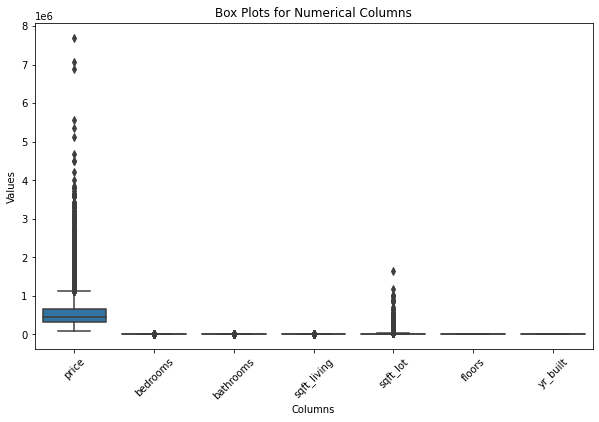

In [16]:
import seaborn as sns
data = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
num_df = data_df[ data]
plt.figure(figsize=(10,6))
sns.boxplot(data=num_df)
plt.xticks(rotation=45)
plt.title("Box Plots for Numerical Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

In [17]:
# Dealing with bathroom outliers

count = 0
bath_outliers = []
mean = np.mean(data_df['bathrooms'])
max_distance = np.std(data_df['bathrooms']) * 3 

for idx, row in data_df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        data_df.drop(idx, inplace=True)
count

168

In [18]:
# Dealing with bedroom outliners
count = 0
bath_outliers = []
mean = np.mean(data_df['bathrooms'])
max_distance = np.std(data_df['bathrooms']) * 3 

for idx, row in data_df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        data_df.drop(idx, inplace=True)
count

0

### Feature Engineering
The grade variable may be highly related with price, but it does not have a clear linear relation. The grade column values are coded on a 3-13 linear scale with 3 being poor and 13 being mansion. We can handle the categorical column to fit out linear regression using hot one-encoding

In [31]:
data_df['condition'].value_counts()


Average      12297
Good          5022
Very Good     1500
Fair           152
Poor            25
Name: condition, dtype: int64

In [19]:
# Viewing the grade colum
data_df['grade'].value_counts()


7 Average        7936
8 Good           5380
9 Better         2294
6 Low Average    1804
10 Very Good      976
11 Excellent      304
5 Fair            212
12 Luxury          59
4 Low              25
13 Mansion          5
3 Poor              1
Name: grade, dtype: int64

In [20]:
mapped_df ={3 : " Poor", 4: 'Low', 5 :' Fair', 6 : 'Low Average',
             7: 'Average', 8: 'Good', 9 :'Better', 10: 'Very Good', 11 : 'Excellent', 12 : 'Luxury', 13 : 'Mansion'}
             
data_df['grade'] = data_df ['grade'].replace(mapped_df)

In [21]:
# Split the "grade" column into two separate columns
data_df[['grade_int', 'grade_str']] = data_df['grade'].str.extract('(\d+)(.*)')
# Convert the "grade_int" column to integer type
data_df['grade_int'] = data_df['grade_int'].astype(int)
data_df.drop('grade', axis=1, inplace= True)

# Display the resulting DataFrame
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,grade_int,grade_str
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,Average,1951,7,Average
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,Average,1933,6,Low Average
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,1965,7,Average
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,Average,1987,8,Good
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,Average,1995,7,Average


C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'House Price and Grade')

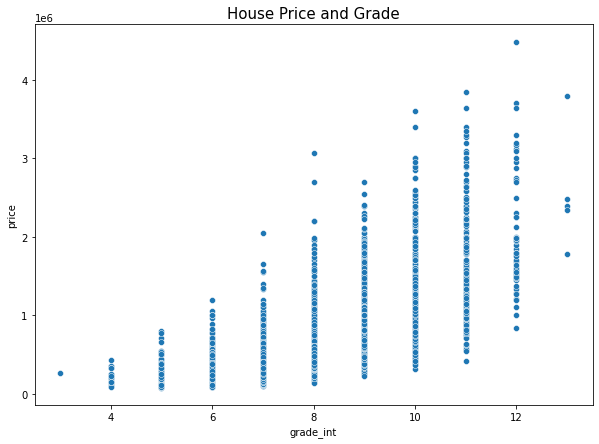

In [33]:
plt.figure(figsize=(10,7))
sns.scatterplot(data_df['grade_int'], data_df['price'])
plt.title('House Price and Grade', fontsize=15, fontname='silom')

C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'House Condition and Price')

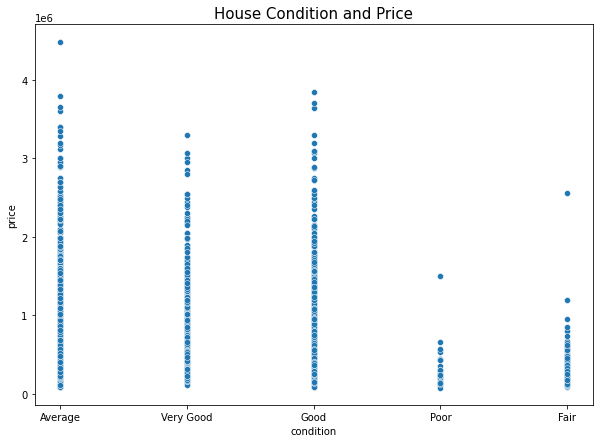

In [23]:
plt.figure(figsize=(10,7))
sns.scatterplot(data_df['condition'], data_df['price'])
plt.title('House Condition and Price', fontsize=15, fontname='silom')

### Checking Correlations and Multicollinearity

In [24]:
# Checking for correlation
corr_matrix= data_df.corr ().abs ()
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,grade_int
id,1.000000,0.017845,0.006920,0.013464,0.007311,0.134091,0.020241,0.025313,0.013297
price,0.017845,1.000000,0.296324,0.489559,0.680180,0.081987,0.261948,0.043843,0.668904
bedrooms,0.006920,0.296324,1.000000,0.496692,0.573639,0.025108,0.171938,0.154073,0.347417
bathrooms,0.013464,0.489559,0.496692,1.000000,0.731829,0.071132,0.513065,0.523815,0.653412
sqft_living,0.007311,0.680180,0.573639,0.731829,1.000000,0.162506,0.356026,0.322225,0.755489
sqft_lot,0.134091,0.081987,0.025108,0.071132,0.162506,1.000000,0.012139,0.052098,0.104703
floors,0.020241,0.261948,0.171938,0.513065,0.356026,0.012139,1.000000,0.491050,0.456867
yr_built,0.025313,0.043843,0.154073,0.523815,0.322225,0.052098,0.491050,1.000000,0.447862
grade_int,0.013297,0.668904,0.347417,0.653412,0.755489,0.104703,0.456867,0.447862,1.000000


In [34]:
data_df.corr()["price"]


id            -0.017845
price          1.000000
bedrooms       0.296324
bathrooms      0.489559
sqft_living    0.680180
sqft_lot       0.081987
floors         0.261948
yr_built       0.043843
grade_int      0.668904
Name: price, dtype: float64

<AxesSubplot:>

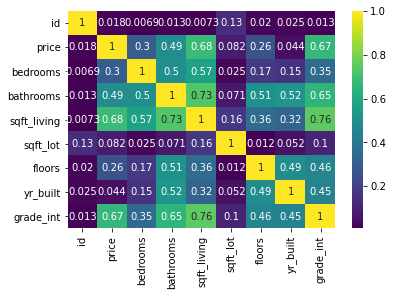

In [25]:
plt.Figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='viridis')

In [26]:
# Dark shades represents weak correlations while lighter shades presents positive correlation
# For instance, there is a week correlation between price and sqft_lot
# The is a high correlation between price and sqft_living
#A high correlation can be considered if the value is around 0.7-0.8 or higher.


In [27]:
data_df.corr()["price"]


id            -0.017845
price          1.000000
bedrooms       0.296324
bathrooms      0.489559
sqft_living    0.680180
sqft_lot       0.081987
floors         0.261948
yr_built       0.043843
grade_int      0.668904
Name: price, dtype: float64

In [28]:
# Stack the correlation matrix
stacked_corr = corr_matrix.stack()

# Select the highest correlation pairs
highest_corr_pairs = stacked_corr.nlargest(20)

# highest correlation pairs
print(highest_corr_pairs)

id           id             1.000000
price        price          1.000000
bedrooms     bedrooms       1.000000
bathrooms    bathrooms      1.000000
sqft_living  sqft_living    1.000000
sqft_lot     sqft_lot       1.000000
floors       floors         1.000000
yr_built     yr_built       1.000000
grade_int    grade_int      1.000000
sqft_living  grade_int      0.755489
grade_int    sqft_living    0.755489
bathrooms    sqft_living    0.731829
sqft_living  bathrooms      0.731829
price        sqft_living    0.680180
sqft_living  price          0.680180
price        grade_int      0.668904
grade_int    price          0.668904
bathrooms    grade_int      0.653412
grade_int    bathrooms      0.653412
bedrooms     sqft_living    0.573639
dtype: float64


C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


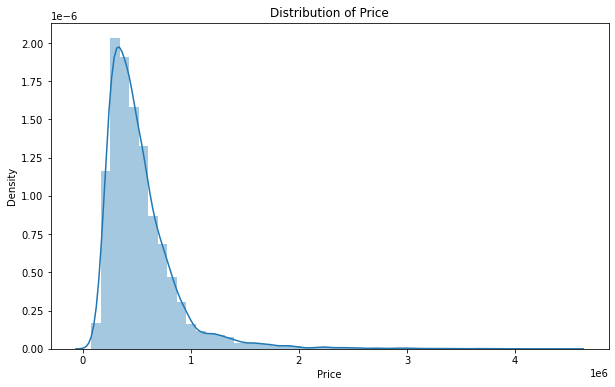

In [29]:
# How price is distributed
plt.figure(figsize=(10,6))
sns.distplot(data_df['price'])
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show();

In [30]:
data_df.corr()["price"]



id            -0.017845
price          1.000000
bedrooms       0.296324
bathrooms      0.489559
sqft_living    0.680180
sqft_lot       0.081987
floors         0.261948
yr_built       0.043843
grade_int      0.668904
Name: price, dtype: float64